In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd

In [2]:
import os

def select_hardware(
    cuda: str = None,
    cpu: str = None,
) -> None:
    os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'

    if cuda is not None:
        os.environ['CUDA_VISIBLE_DEVICES'] = cuda

    if cpu is not None:
        os.environ["MKL_NUM_THREADS"] = cpu
        os.environ["NUMEXPR_NUM_THREADS"] = cpu
        os.environ["OMP_NUM_THREADS"] = cpu

select_hardware(
    cuda="1",
    cpu="4"
)

In [3]:
import torch
from pathlib import Path
import yaml

from tddl.factorizations import number_layers
from tddl.factorizations import listify_numbered_layers

In [6]:
summary_file = Path("/home/jetzeschuurman/gitProjects/phd/pytorch-image-models/output/train/20211208-154242-efficientnet_b2-256/summary.csv")
# experiment = "efficientnet_b2-256-tucker-0.75-k1x1"
# run = "20211216-113721"
# logdir = logroot/experiment/run
# file_name = "args.yaml"

# with open(summary_file, "r") as stream:
#     try:
#         args = yaml.safe_load(stream)
#     except yaml.YAMLError as exc:
#         print(exc)

In [9]:
summary = pd.read_csv(summary_file)
summary.set_index('epoch', inplace=True)


<AxesSubplot:xlabel='epoch', ylabel='loss'>

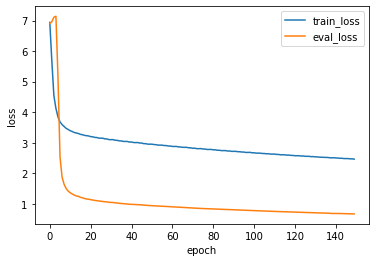

In [17]:
summary[['train_loss', 'eval_loss']].plot(ylabel='loss')

In [14]:
summary.head()

,train_loss,eval_loss,eval_top1,eval_top5
epoch,,,,
0,6.940826,6.908084,0.101470,0.507350
1,5.674017,6.961487,0.101470,0.505164
2,4.539865,7.111141,0.185378,0.535605
3,4.124175,7.143033,0.315416,0.755717
4,3.845062,5.162577,10.799373,26.424658


<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

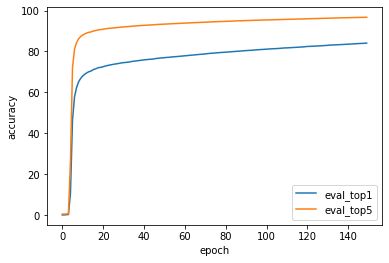

In [18]:
summary[['eval_top1', 'eval_top5']].plot(ylabel='accuracy')

In [7]:
print(args['factorization'], args['fact_rank'], args['layers'])

tucker 0.75 k1x1


name
conv_expand    AxesSubplot(0.125,0.125;0.775x0.755)
conv_pw        AxesSubplot(0.125,0.125;0.775x0.755)
conv_pwl       AxesSubplot(0.125,0.125;0.775x0.755)
conv_reduce    AxesSubplot(0.125,0.125;0.775x0.755)
Name: error, dtype: object

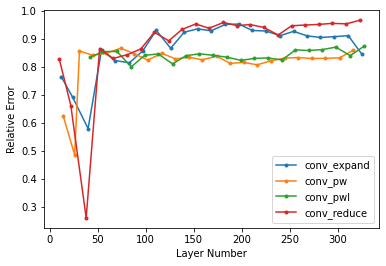

In [31]:
grouped_errors = df_errors.groupby(by='name')
grouped_errors['error'].plot(legend=True, style=".-", ylabel='Relative Error', xlabel='Layer Number')

name
conv_expand    AxesSubplot(0.125,0.125;0.775x0.755)
conv_pw        AxesSubplot(0.125,0.125;0.775x0.755)
conv_pwl       AxesSubplot(0.125,0.125;0.775x0.755)
conv_reduce    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

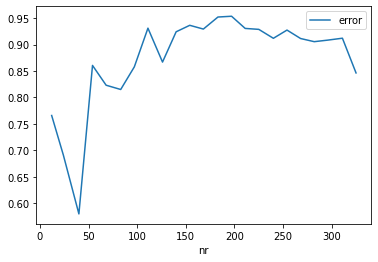

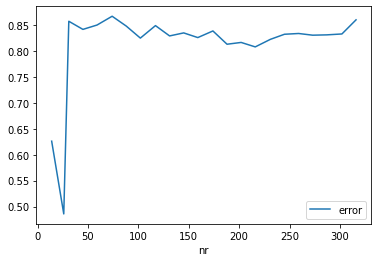

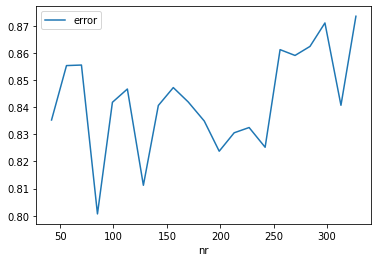

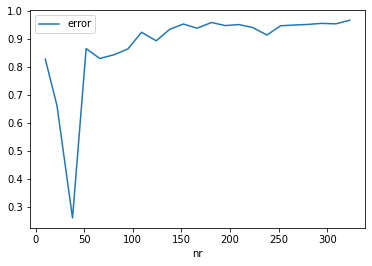

In [141]:
grouped_errors.plot(x='nr', y='error')

<AxesSubplot:xlabel='nr'>

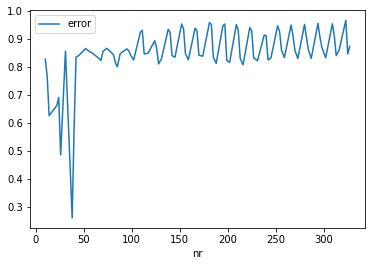

In [140]:
df_errors.plot(x='nr', y='error')